# K-means
- 군집화clustering 알고리즘 중 하나
- 비지도 학습unsupervised learning 방식
## 1. 용어
### 군집 cluster
- 유사한 데이터 포인트의 모임
### 중심점 centroid
- 각 군집의 중심. 군집 내의 모든 데이터 포인트와의 평균 위치
### 할당 assignment
- 각 데이터 포인트를 가장 가까운 중심점에 할당하는 과정
### 재계산recalculation
- 각 군집의 중심점을 데이터 포인트와의 평균 위치로 업데이트하는 과정
## 2. 개념
- 데이터를 K개의 군집cluster로 나눠 각 데이터 포인트가 가장 가까운 군집에 속하기 함
- 각 군집은 중심점centroid을 가지며, 데이터 포인트는 이 중심점과의 거리가 최소화되도록 할당
## 3. K-means 알고리즘 단계
1. K개의 중심점을 데이터 공간 내에서 무작위로 설정
2. 할당 단계 : 각 데이터 포인트를 가장 가까운 중심점에 할당 ('멤버쉽을 준다'고 표현)
3. 중심점 재계산 : 각 군집의 중심점을 할당된 데이터 포인트들의 평균으로 업데이트
4. 할당 단계와 중심점 재계산 단계를 중심점이 더 이상 변하지 않을 때까지 반복
## 4. 수식
### 유클리디안 거리
- K-means에서 주로 사용
- 데이터 포인트와 중심점 간의 거리 계산

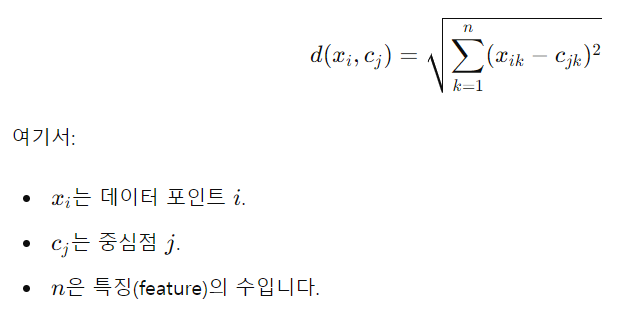

### 중심점 계산
- 군집 내의 모든 데이터 포인트의 평균

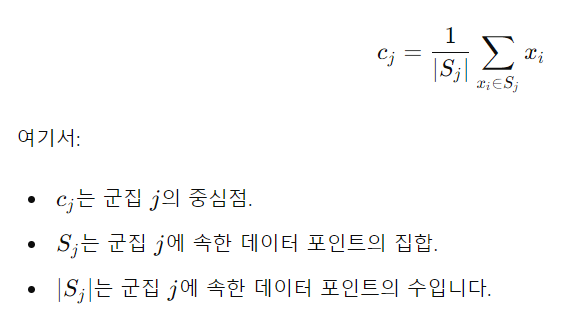

## 5. 주요 특징
- K값 선택 : K값은 사전에 설정해야 함. 데이터셋에 따라 적절한 K값 선택. Elbow Method 등을 사용하여 최적의 K값 선택 가능
- 초기 중심점 선택 : 초기 중심점 선택에 따라 결과가 달라질 수 있음. 최적화를 위해 여러 번 실행
- 수렴 : K-means는 할당 단계와 재계산 단계를 반복하여 수렴. 수렴 시 중심점이 더 이상 변하지 않음
## 6. 장점
- 구현이 간단하고 이해하기 쉬움
- 대규모 데이터셋에서도 빠르게 동작
- 데이터 포인트를 명확하게 할당할 수 있음
## 7. 단점
- 군집 수 K를 사전에 설정해야 함
- 초기 중심점 선택에 민감
- 군집 형태가 원형일 때 잘 동작
- 복잡한 형태의 군집에서는 성능이 떨어짐


### 간단한 군집화

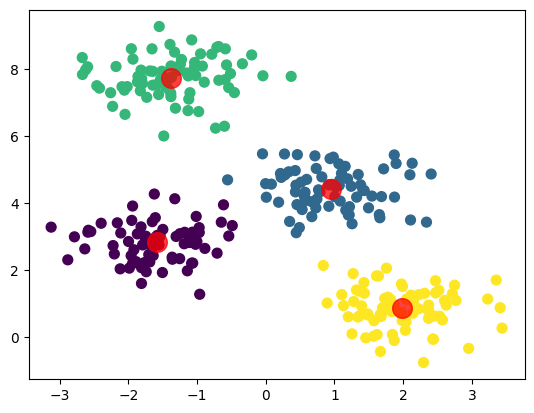

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# 데이터 생성
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# K-means 모델 학습
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

# 중심점을 반환하여 배열의 형태로 저장
# 배열의 크기는 K * n_features
centers = kmeans.cluster_centers_
# 각 데이터 포인트가 속한 군집의 레이블을 배열 형태로 저장
# 배열의 길이는 데이터 포인트 수와 동일
labels = kmeans.labels_

# 데이터 포인트 시각화
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
# 중심점 시각화
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75)
plt.show()


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans 
import warnings
warnings.filterwarnings('ignore')

In [2]:
#music dataset 불러오기
df_bts = pd.read_csv(r'Spotify_BTS_AudioFeatures.csv')
df_bts.head()

,Unnamed: 0,Title,Artist,Release,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,1,Like,BTS,2013/6/12,0.582,0.726,0,-4.174,0,0.1160,0.27100,0.000000,0.227,0.768,100.450,1HQHuPpr2s2z3VIBTLtUmv,231883
1,2,No More Dream,BTS,2013/6/12,0.436,0.869,2,-5.174,1,0.4720,0.01240,0.000002,0.494,0.612,167.766,4frlkLwlnm58ejpNwWjxyl,221593
2,3,We Are Bulletproof Pt.2,BTS,2013/6/12,0.754,0.952,8,-5.110,0,0.1530,0.00945,0.000006,0.189,0.868,144.051,2Kspa0jD2MSkaEdonf4Cnb,225360
3,4,Attack on Bangtan,BTS,2013/9/11,0.722,0.961,11,-2.548,0,0.2670,0.20300,0.000000,0.121,0.678,118.016,6bCoSWW1zyQrwQDSMEmsVy,247160
4,5,Coffee,BTS,2013/9/11,0.652,0.794,0,-6.604,1,0.0957,0.00808,0.000000,0.298,0.545,92.045,0Tb8sBQ9fseZbDRzRSxTdi,261453


In [3]:
#데이터 전처리

#1. 칼럼 성격에 따라 info용 DataFrame과 분석용 DataFrame으로 분리
df_bts_info = df_bts[["Title",	"Artist",	"Release"]]
df_bts_anal = df_bts.drop(["Unnamed: 0", "Title",	"Artist",	"Release", "key",	"id"], axis = 1)

#2. 분석용 DataFrame 스케일링 진행
scaler = StandardScaler()
df_bts_anal_s = pd.DataFrame(data = scaler.fit_transform(df_bts_anal), columns = df_bts_anal.columns)
df_bts_anal_s["duration"] = df_bts_anal_s["duration_ms"]
df_bts_anal_s = df_bts_anal_s.drop(["duration_ms"], axis = 1)
df_bts_anal_s.head()

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration
0,-0.387776,-0.279935,0.329929,-1.123182,-0.090282,1.245994,-0.147170,0.233761,1.198595,-0.756189,0.003835
1,-1.745654,0.747749,-0.271117,0.890327,2.904543,-0.643637,-0.141153,2.051508,0.371794,1.683076,-0.300891
2,1.211917,1.344238,-0.232650,-1.123182,0.220978,-0.665193,-0.123590,-0.024944,1.728596,0.823738,-0.189335
3,0.914300,1.408917,1.307231,-1.123182,1.179995,0.749108,-0.147170,-0.487891,0.721594,-0.119667,0.456246
4,0.263262,0.208754,-1.130613,0.890327,-0.261054,-0.675204,-0.147170,0.717132,0.016693,-1.060753,0.879516


In [4]:
#K-means 모델 학습
kmeans = KMeans(n_clusters=6, random_state=0, init="random").fit(df_bts_anal_s)
# 각 클러스터의 중심점 배열
df_centroids = pd.DataFrame(kmeans.cluster_centers_, columns=df_bts_anal_s.columns)
df_centroids

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration
0,-0.565602,0.560323,0.295237,0.648706,0.778655,0.093154,-0.142513,0.024291,-0.000267,1.569046,0.553190
1,1.252607,-0.464691,-0.142844,0.135261,-0.333717,-0.301461,0.179011,-0.152510,0.865578,-0.158195,-1.162030
2,1.072409,-3.370177,-3.852751,-0.116427,3.039141,4.446529,5.211815,2.160437,-0.889608,-0.431460,-1.287623
3,-0.158459,-0.359437,-0.192229,-1.123182,-0.535063,-0.001102,-0.082424,-0.148127,-0.619805,-0.216000,0.174440
4,-0.176725,0.937365,0.951573,-0.658526,0.525443,-0.099302,-0.144475,0.556148,0.842271,-0.521872,-0.147943
5,-0.221100,-0.236438,-0.390440,0.890327,-0.370394,-0.036045,-0.125346,-0.289150,-0.554034,-0.370681,0.392070


- 위 결과는 각 군집의 중심점을 나타냄
- 각 군집에 속하는 데이터 포인트들의 각 특성 평균값

In [5]:
from collections import Counter
# 각 클러스터에 할당된 데이터 포인트 수 계산
c = Counter()
c.update(kmeans.labels_)
c

Counter({5: 38, 3: 32, 4: 26, 0: 25, 1: 24, 2: 2})

In [6]:
# 각 클러스터의 크기 계산해서 열 추가
label_counts = [c[x] for x in df_centroids.index]
df_centroids['size'] = label_counts
df_centroids

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,size
0,-0.565602,0.560323,0.295237,0.648706,0.778655,0.093154,-0.142513,0.024291,-0.000267,1.569046,0.553190,25
1,1.252607,-0.464691,-0.142844,0.135261,-0.333717,-0.301461,0.179011,-0.152510,0.865578,-0.158195,-1.162030,24
2,1.072409,-3.370177,-3.852751,-0.116427,3.039141,4.446529,5.211815,2.160437,-0.889608,-0.431460,-1.287623,2
3,-0.158459,-0.359437,-0.192229,-1.123182,-0.535063,-0.001102,-0.082424,-0.148127,-0.619805,-0.216000,0.174440,32
4,-0.176725,0.937365,0.951573,-0.658526,0.525443,-0.099302,-0.144475,0.556148,0.842271,-0.521872,-0.147943,26
5,-0.221100,-0.236438,-0.390440,0.890327,-0.370394,-0.036045,-0.125346,-0.289150,-0.554034,-0.370681,0.392070,38


In [11]:
# Centroid 시각화를 통해 각 군집의 특성 파악
# Plotly의 그래프 객체 라이브러리를 이용해 복잡한 그래프 그릴 수 있음
import plotly.graph_objects as go

# 클러스터 중심점 df를 이용해 레이터 차트로 시각화
def plot_radar_from_centroid(df_centroids):
  # 레이더 차트 그릴 때 클러스터 크기 정보 필요없어서 열 제거
  df_centroids = df_centroids.drop(['size'], axis = 1)
  fig = go.Figure()
  # 각 클러스터 중심점에 대해 레이터 차트 데이터 추가
  categories = df_centroids.columns
  for row in df_centroids.iterrows():
    fig.add_trace(go.Scatterpolar(
        r=row[1].tolist(),
        theta=categories,
        fill='toself',
        name='cluster {}'.format(row[0])
    ))

  fig.update_layout(
      autosize=False,
      width=1000,
      height=800)
  fig.show()

In [12]:
plot_radar_from_centroid(df_centroids)

# 심화
# K-means++
- K-means가 초기 중심점 선택에 큰 영향을 받는다는 단점을 보완
## K-means++의 개선된 초기화 방법
1. 데이터 포인트 중 하나를 랜덤하게 선택하여 첫 번째 중심점으로 설정
2. 현재까지 선택된 중심점들과의 거리 기반으로 각 데이터 포인트의 '거리' 계산
    - 거리? 각 데이터 포인트와 가장 가까운 중심점까지의 거리
3. 거리^2을 사용해 중심점을 선택할 확률을 정함
    - 거리가 멀수록 중심점으로 선택될 확률 높음
4. 원하는 K값 정할 때까지 위 과정 반복
5. 선택된 K개의 초기 중심점을 이용해 K-means 시작

## K-means vs K-means++
1. 초기화 방법
- K-Means : 중심점을 랜덤하게 선택, 이로 인해 초기 중심점이 데이터의 분포를 잘 반영하지 못할 수 있음
- K-Means++ : 거리 기반의 확률적 방법으로 초기 중심점을 선택하여 데이터 분포를 더 잘 반영, 초기 중심점이 서로 멀리 떨어져 있어 군집화 성능이 향상
2. 클러스터링 품질
- K-Means : 초기 중심점에 따라 군집화의 품질이 크게 달라질 수 있음
- K-Means++ : 초기화 방법이 개선되어 클러스터링의 품질이 일관되게 향상
3. 수렴 속도
- K-Means : 나쁜 초기화(데이터 분포 잘 반영 못한 중심점 무작위 선택)로 인해 수렴 속도가 느려질 수 있음
- K-Means++ : 초기화가 개선되어 더 빠르게 수렴하며, 더 나은 군집화를 제공

In [13]:
# K-means++ 로 초기값 지정
kmeans_pp = KMeans(n_clusters=6, random_state=0).fit(df_bts_anal_s)

df_centroids_pp = pd.DataFrame(kmeans_pp.cluster_centers_, columns=df_bts_anal_s.columns)

c2 = Counter()
c2.update(kmeans_pp.labels_)
label_counts2 = [c2[x] for x in df_centroids_pp.index]
df_centroids_pp['size'] = label_counts2

df_centroids_pp

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,size
0,-0.584778,-0.747065,-0.590801,-0.207951,-0.586258,0.318563,-0.096108,0.110701,-1.080087,-0.402896,0.253660,33
1,0.495776,0.455323,0.356232,0.794446,-0.266002,-0.359528,0.031342,-0.108683,0.314756,-0.253164,0.222921,42
2,0.333326,0.093289,0.311965,-0.899459,0.006648,-0.143128,-0.110023,-0.056639,0.812283,-0.227442,-0.611513,45
3,0.737590,-3.190512,-5.056046,0.890327,6.370463,5.579139,-0.147170,4.870037,0.011393,-0.235405,-1.546004,1
4,1.407229,-3.549842,-2.649457,-1.123182,-0.292180,3.313920,10.570800,-0.549163,-1.790610,-0.627515,-1.029243,1
5,-0.746776,0.322877,-0.071930,0.568166,0.965646,0.085412,-0.144695,-0.034421,-0.494016,1.401050,0.494393,25


In [14]:
plot_radar_from_centroid(df_centroids_pp)

### 실루엣 점수(Silhouette Score)
- 클러스터링의 유효성을 평가하는 메트릭
- 각 데이터 포인트가 자신의 클러스터에 잘 맞는지 평기
- 1에 가까울수록, 클러스터링 잘된 것, 다른 클러스터와 잘 구분 됨
- 0에 가까울수록, 데이터 포인트가 자신이 속한 클러스터와 다른 클러스터 간의 경계에 위치
- 음수인 경우 클러스터링이 잘못된 것, 자신이 속한 클러스터보다 다른 클러스터에 더 가까운 경우

In [15]:
# Silhouette 계수 계산
from sklearn.metrics import silhouette_score, silhouette_samples
# silhouette_score를 이용해 클러스터링 품질을 측정하여 응집력과 분리도를 평가
silhouette_avg = silhouette_score(df_bts_anal_s, kmeans_pp.labels_)
# 실루엣 점수 계산
print(silhouette_avg)

0.11836373126648048


In [16]:
# K값에 따른 Silhouette 계수 비교
# 최적 클러스터 수를 찾기 위해
for k in range(3, 10):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(df_bts_anal_s)
    silhouette_avg = silhouette_score(df_bts_anal_s, kmeans.labels_)
    print("k = {} -> silhouette index {}".format(k, silhouette_avg))

k = 3 -> silhouette index 0.10228054724823357
k = 4 -> silhouette index 0.11203039085884313
k = 5 -> silhouette index 0.12026889390976044
k = 6 -> silhouette index 0.11836373126648048
k = 7 -> silhouette index 0.13231524914616385
k = 8 -> silhouette index 0.11514758463687871
k = 9 -> silhouette index 0.11205819770055696


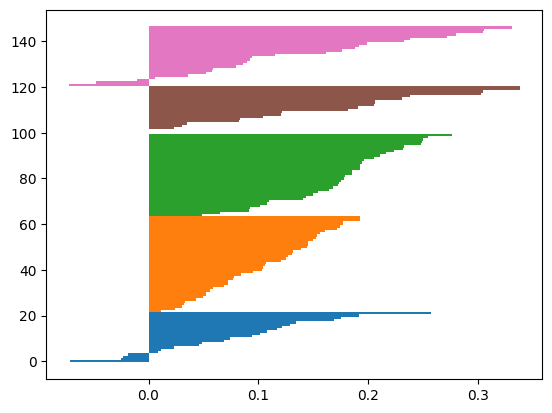

In [17]:
# Silhouette 계수 시각화
k = 7

fig, ax = plt.subplots(1, 1)
kmeans = KMeans(n_clusters=k, random_state=0).fit(df_bts_anal_s)
silhouette_vals = silhouette_samples(df_bts_anal_s, kmeans.labels_)
y_ticks = []
y_lower = y_upper = 0

for c_num in np.unique(kmeans.labels_):
    cluster_silhouette_vals = silhouette_vals[kmeans.labels_==c_num]
    y_upper += len(cluster_silhouette_vals)
    cluster_silhouette_vals.sort()

    ax.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1)
    y_lower += len(cluster_silhouette_vals)